In [ ]:
#pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# save api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?&units=Imperial&appid=e28be1fc4ecfc328d5d5cc82d661a441&q=


In [4]:
# Performing a weather check on city using a series of API calls:

# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1


# Looping through all the cities in our list and performing a request:
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
      
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    # (Using try & except)
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        # Suspension time to prevent api from getting locked
        time.sleep(1)
        
    # Handle exceptions for experienced error, skip the city:
    except:
        # Append null values
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tosya
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | obluche
City not found. Skipping...
Processing Record 5 of Set 1 | umm lajj
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | oga
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | swan hill
Processing Record 13 of Set 1 | ust-karsk
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | kholm-zhirkovskiy
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | burica
City not found. Skipping...
Processing 

Processing Record 36 of Set 4 | alexandria
Processing Record 37 of Set 4 | altamont
Processing Record 38 of Set 4 | skole
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | marawi
Processing Record 42 of Set 4 | narsaq
Processing Record 43 of Set 4 | shache
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | comodoro rivadavia
Processing Record 47 of Set 4 | ixtapa
Processing Record 48 of Set 4 | yuzhno-kurilsk
Processing Record 49 of Set 4 | villazon
Processing Record 0 of Set 5 | maun
Processing Record 1 of Set 5 | los llanos de aridane
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | katangli
Processing Record 5 of Set 5 | san cristobal
Processing Record 6 of Set 5 | muzaffarabad
Processing Record 7 of Set 5 | kisangani
Processing Record 8 of Set 5 | haines juncti

Processing Record 26 of Set 8 | sao filipe
Processing Record 27 of Set 8 | puquio
Processing Record 28 of Set 8 | imbituba
Processing Record 29 of Set 8 | ayagoz
Processing Record 30 of Set 8 | belgrade
Processing Record 31 of Set 8 | sinnamary
Processing Record 32 of Set 8 | lasa
Processing Record 33 of Set 8 | beaufort
Processing Record 34 of Set 8 | areka
Processing Record 35 of Set 8 | atar
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | yilan
Processing Record 38 of Set 8 | randolph
Processing Record 39 of Set 8 | markova
Processing Record 40 of Set 8 | mocuba
Processing Record 41 of Set 8 | ballina
Processing Record 42 of Set 8 | vejalpur
Processing Record 43 of Set 8 | bathsheba
Processing Record 44 of Set 8 | litovko
Processing Record 45 of Set 8 | brownwood
Processing Record 46 of Set 8 | beja
Processing Record 47 of Set 8 | angelholm
City not found. Skipping...
Processing Record 48 of Set 8 | maceio
Processing Record 49 of Set 8 | zyryanskoye
Processing 

Processing Record 13 of Set 12 | seoul
Processing Record 14 of Set 12 | coihueco
Processing Record 15 of Set 12 | askiz
Processing Record 16 of Set 12 | tlahualilo
City not found. Skipping...
Processing Record 17 of Set 12 | oum hadjer
Processing Record 18 of Set 12 | terney
Processing Record 19 of Set 12 | thunder bay
Processing Record 20 of Set 12 | college
Processing Record 21 of Set 12 | kisumu
Processing Record 22 of Set 12 | salinas
Processing Record 23 of Set 12 | cortez
Processing Record 24 of Set 12 | huarmey
Processing Record 25 of Set 12 | kazachinskoye
Processing Record 26 of Set 12 | maarianhamina
Processing Record 27 of Set 12 | sorland
Processing Record 28 of Set 12 | schladming
Processing Record 29 of Set 12 | lagunillas
Processing Record 30 of Set 12 | itoman
Processing Record 31 of Set 12 | bairiki
Processing Record 32 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 33 of Set 12 | utica
Processing Record 34 of Set 12 | denpasar
Processing Record 35 o

In [5]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tosya,41.0155,34.0401,33.82,83,38,2.73,TR,1673196029
1,Punta Arenas,-53.1500,-70.9167,57.31,54,0,11.50,CL,1673196030
2,Umluj,25.0213,37.2685,71.89,51,100,6.13,SA,1673196031
3,Mar del Plata,-38.0023,-57.5575,85.82,80,20,21.00,AR,1673196033
4,Albany,42.6001,-73.9662,30.63,67,2,3.09,US,1673196034


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv("../output_data/city_weather.csv", index=False, header=True)
weather_df.describe()
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tosya,41.0155,34.0401,33.82,83,38,2.73,TR,1673196029
1,Punta Arenas,-53.1500,-70.9167,57.31,54,0,11.50,CL,1673196030
2,Umluj,25.0213,37.2685,71.89,51,100,6.13,SA,1673196031
3,Mar del Plata,-38.0023,-57.5575,85.82,80,20,21.00,AR,1673196033
4,Albany,42.6001,-73.9662,30.63,67,2,3.09,US,1673196034


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()
# Filtered data by humidity:
filtered_df = weather_df.loc[weather_df['Humidity'] < 100]
len(filtered_df)
# Checking the weather_df and comparing it to the filtered_df:
len(weather_df)

filtered_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,5.260000e+02
mean,17.244324,10.369124,54.869867,71.792776,55.245247,8.228783,1.673196e+09
std,32.631674,87.580734,30.178037,21.915874,39.353813,5.749324,2.204545e+02
min,-54.800000,-179.166700,-40.220000,10.000000,0.000000,0.000000,1.673196e+09
25%,-9.082575,-64.765925,37.595000,62.000000,15.250000,4.345000,1.673196e+09
50%,20.823700,14.799800,64.400000,77.000000,67.000000,7.230000,1.673196e+09
75%,43.934825,79.687525,78.165000,88.750000,99.000000,10.360000,1.673197e+09
max,78.218600,179.316700,102.380000,99.000000,100.000000,38.390000,1.673197e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
for x in over_100:
    clean_city_data = weather_df.drop([x])
clean_city_data    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tosya,41.0155,34.0401,33.82,83,38,2.73,TR,1673196029
1,Punta Arenas,-53.1500,-70.9167,57.31,54,0,11.50,CL,1673196030
2,Umluj,25.0213,37.2685,71.89,51,100,6.13,SA,1673196031
3,Mar del Plata,-38.0023,-57.5575,85.82,80,20,21.00,AR,1673196033
4,Albany,42.6001,-73.9662,30.63,67,2,3.09,US,1673196034
...,...,...,...,...,...,...,...,...,...
550,Inhambane,-23.8650,35.3833,73.38,88,75,9.22,MZ,1673196765
551,Deniliquin,-35.5333,144.9667,74.21,28,25,3.00,AU,1673196766
552,Hollins,37.3413,-79.9431,36.48,78,100,5.75,US,1673196768
553,San Ramon,37.7799,-121.9780,56.28,89,75,6.91,US,1673196769


In [9]:
# Extract relevant fields from the cleaned dataframe
lat = clean_city_data .Lat
max_temp = clean_city_data ["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the clean_city_data into a csv:
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

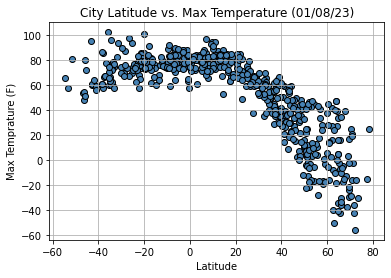

In [10]:
# Plot 1: Latitude vs. Temperature Plot
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

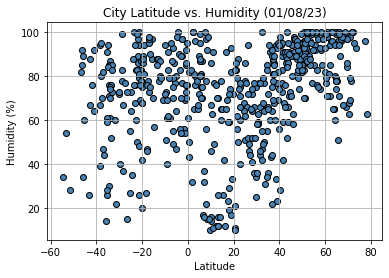

In [11]:
# Plot 2: Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

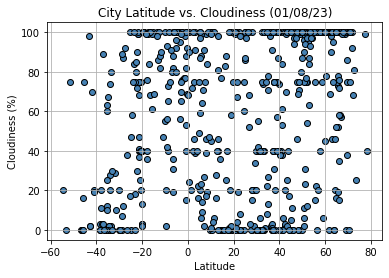

In [12]:
# Plot 3: Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

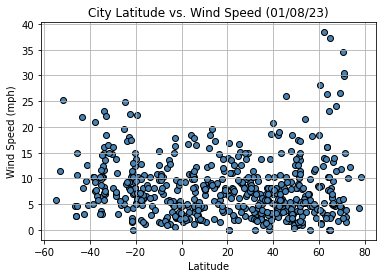

In [13]:
# Plot 4: Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [14]:
# Creating northern and southern hemisphere dataframe for linear regression:

north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 8.59362966674015e-114
The r-value is: -0.8650593421486665


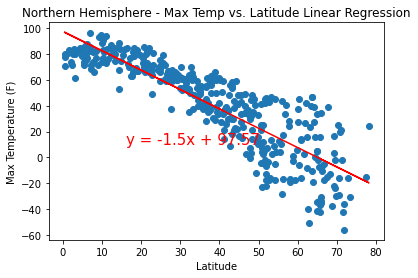

In [15]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_temp_lg.png")
plt.show() 

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 7.358705179253144e-07
The r-value is: 0.359185029019023


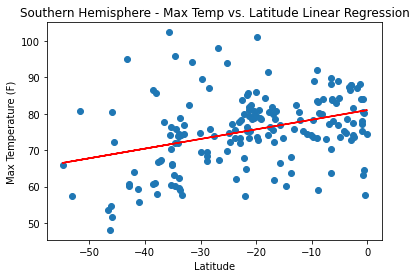

In [16]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_temp_lg.png")
plt.show()

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 1.109901760996498e-22
The r-value is: 0.4767836314480067


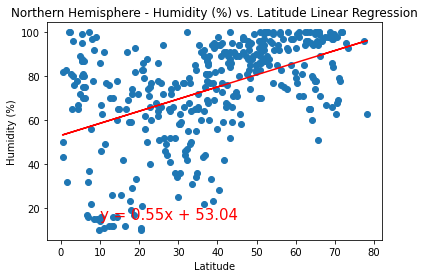

In [17]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_humidity_lg.png")
plt.show() 

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.003223499166037421
The r-value is: 0.2184151426769131


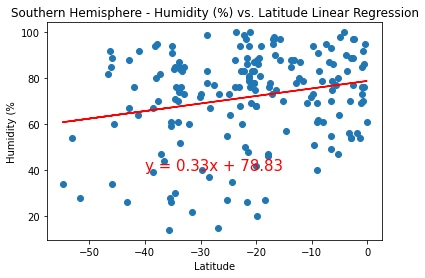

In [18]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_humidity_lg.png")
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 2.440795047463359e-06
The r-value is: 0.2405978937994075


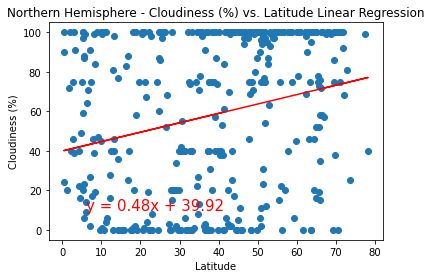

In [19]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_cloud_lg.png")
plt.show() 

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 3.452473251006102e-17
The r-value is: 0.5743759861745854


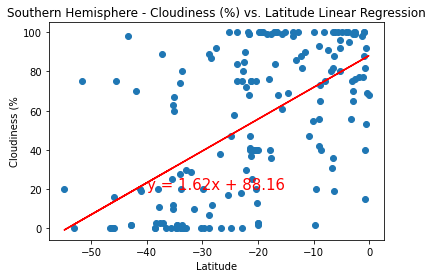

In [20]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_cloud_lg.png")
plt.show()

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.04300819570786118
The r-value is: 0.1045622893265265


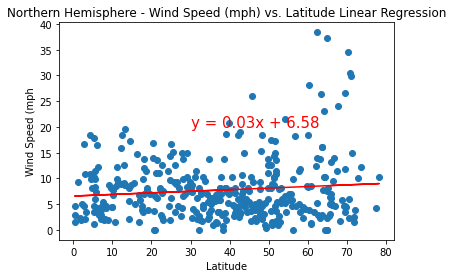

In [21]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_wind_lg.png")
plt.show() 

In [ ]:
###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 6.089754757175639e-05
The r-value is: -0.29424320759642325


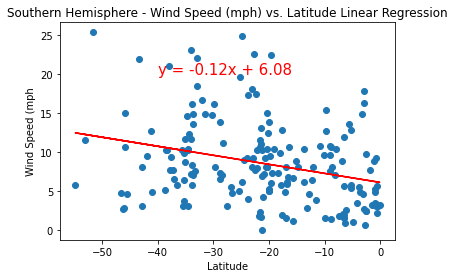

In [22]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_wind_lg.png")
plt.show() 